 В этом проекте попробую импортировать только двумерный набор данных ЗАРАБОТАЛО

In [1]:
from kan import *
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cpu


In [2]:
data = pd.read_csv('file_for_input/all_hour/SBER_tradestats_test_hour.csv')
data = data[['pr_open_hour','pr_close_hour']] # Не добавлются сюда другие лейблы
# ['vol','val','trades','trades_b','trades_s', 'val_b','val_s','vol_b','vol_s','pr_open_hour','pr_high_hour','pr_low_hour','pr_close_hour'] <- полный список параметров
data_lable= data [['pr_close_hour']]

data_tensor = torch.tensor(data.values, dtype=torch.float32)
data_tensor_lable=torch.tensor(data_lable.values, dtype=torch.float32)
print (data_tensor.shape)

torch.Size([8525, 2])


In [3]:
# Убедитесь, что device определен (проверить код в этой ячейке)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Создание датасета
dataset = create_dataset_from_data(data_tensor, data_tensor_lable, train_ratio=0.8, device=device)

# Проверка размеров датасета
print(dataset['train_input'].shape)
print(dataset['train_label'].shape)
print(dataset['test_input'].shape)
print(dataset['test_label'].shape)


torch.Size([6820, 2])
torch.Size([6820, 1])
torch.Size([1705, 2])
torch.Size([1705, 1])


In [4]:
dataset['train_input']

tensor([[251.9200, 251.6000],
        [135.9500, 135.9800],
        [140.9100, 141.3200],
        ...,
        [307.9700, 306.1100],
        [235.6700, 235.4700],
        [260.5900, 261.5700]])

In [5]:
dataset['train_label']  

tensor([[251.6000],
        [135.9800],
        [141.3200],
        ...,
        [306.1100],
        [235.4700],
        [261.5700]])

In [6]:
dataset['train_input'].shape, dataset['train_label'].shape 

(torch.Size([6820, 2]), torch.Size([6820, 1]))

# initialize KAN with G=3


In [8]:
model = KAN(width=[2,1,1], grid=6, k=3, seed=1, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [9]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 5.36e-01 | test_loss: 5.02e-01 | reg: 1.95e+01 | : 100%|█| 50/50 [00:11<00:00,  4.33it

saving model version 0.1


In [10]:
model = model.refine(20)

saving model version 0.2


In [ ]:

model.fit(dataset, opt="LBFGS", steps=50);


In [12]:
grids = np.array([3,10,20,50,60])

train_losses = []
test_losses = []
steps = 20
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,1,1], grid=grids[i], k=k, seed=1, device=device)
    if i != 0:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.32e-03 | test_loss: 3.39e-03 | reg: 5.75e+00 | : 100%|█| 20/20 [00:04<00:00,  4.94it


saving model version 0.1
saving model version 0.2


| train_loss: 1.25e-03 | test_loss: 1.31e-03 | reg: 5.75e+00 | : 100%|█| 20/20 [00:02<00:00,  7.67it


saving model version 0.3
saving model version 0.4


| train_loss: 1.27e-03 | test_loss: 1.32e-03 | reg: 5.75e+00 | : 100%|█| 20/20 [00:02<00:00,  9.28it


saving model version 0.5
saving model version 0.6


| train_loss: 1.65e-03 | test_loss: 1.32e-03 | reg: 5.75e+00 | : 100%|█| 20/20 [00:02<00:00,  7.35it


saving model version 0.7
saving model version 0.8


| train_loss: 1.70e-03 | test_loss: 1.32e-03 | reg: 5.75e+00 | : 100%|█| 20/20 [00:03<00:00,  6.62it

saving model version 0.9


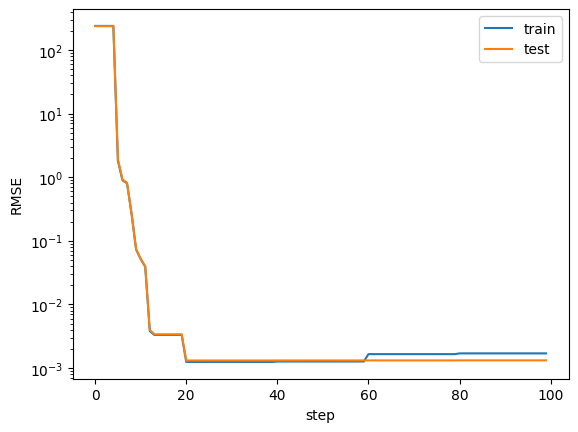

In [13]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

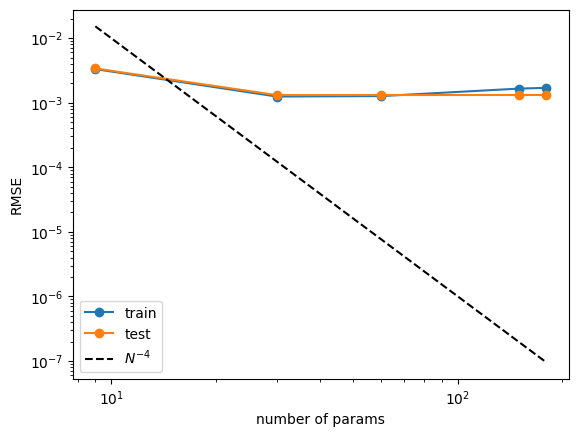

In [14]:
n_params = 3 * grids
train_vs_G = train_losses[(steps-1)::steps]
test_vs_G = test_losses[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

In [ ]:
print